In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import plotly.express as px

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### EDA

In [6]:
#Check the null value
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
a=df.groupby('State')

In [8]:
a.describe()

R&D Spend                                                   \
               count          mean           std      min         25%   
State                                                                   
California      17.0  64657.674118  46678.808917     0.00  28754.3300   
Florida         16.0  80724.016250  42467.890338  1315.46  60369.3475   
New York        17.0  76195.062353  49398.416652   542.05  46014.0200   

                                            Administration                 \
                  50%        75%        max          count           mean   
State                                                                       
California  63408.860   91992.39  162597.70           17.0  120746.507059   
Florida     74661.715  106420.62  153441.51           16.0  121768.897500   
New York    77044.010  114523.61  165349.20           17.0  121543.470588   

            ... Marketing Spend            Profit                 \
            ...             75%        max  count           mean   
State       ...                                                    
California  ...     252664.9300  443898.53   17.0  103905.175294   
Florida     ...     303681.6275  407934.54   16.0  118774.024375   
New York    ...     311613.2900  471784.10   17.0  113756.446471   

                                                                        \
                     std       min         25%        50%          75%   
State                                                                    
California  44446.359357  14681.40  78239.9100   97427.84  134307.3500   
Florida     35605.470428  49490.75  99147.9225  109543.12  142719.6275   
New York    41140.258117  35673.41  96479.5100  108552.04  129917.0400   

                       
                  max  
State                  
California  191792.06  
Florida     191050.39  
New York    192261.83  

[3 rows x 32 columns]

In [9]:
a.describe().transpose()

State                     California        Florida       New York
R&D Spend       count      17.000000      16.000000      17.000000
                mean    64657.674118   80724.016250   76195.062353
                std     46678.808917   42467.890338   49398.416652
                min         0.000000    1315.460000     542.050000
                25%     28754.330000   60369.347500   46014.020000
                50%     63408.860000   74661.715000   77044.010000
                75%     91992.390000  106420.620000  114523.610000
                max    162597.700000  153441.510000  165349.200000
Administration  count      17.000000      16.000000      17.000000
                mean   120746.507059  121768.897500  121543.470588
                std     28424.397614   25329.554225   31528.058440
                min     51283.140000   84710.770000   51743.150000
                25%    108679.170000  105077.645000   99814.710000
                50%    121597.550000  115728.745000  127382.300000
                75%    139553.160000  131524.280000  148718.950000
                max    157693.920000  182645.560000  153773.430000
Marketing Spend count      17.000000      16.000000      17.000000
                mean   182540.929412  247323.551250  205346.015882
                std    115878.956226   89948.684628  150241.521460
                min         0.000000   91131.240000       0.000000
                25%    127716.820000  191962.792500   88218.230000
                50%    174999.300000  253176.180000  205517.640000
                75%    252664.930000  303681.627500  311613.290000
                max    443898.530000  407934.540000  471784.100000
Profit          count      17.000000      16.000000      17.000000
                mean   103905.175294  118774.024375  113756.446471
                std     44446.359357   35605.470428   41140.258117
                min     14681.400000   49490.750000   35673.410000
                25%     78239.910000   99147.922500   96479.510000
                50%     97427.840000  109543.120000  108552.040000
                75%    134307.350000  142719.627500  129917.040000
                max    191792.060000  191050.390000  192261.830000

In [10]:
a.describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
California,17.0,103905.175294,44446.359357,14681.40,78239.9100,97427.84,134307.3500,191792.06
Florida,16.0,118774.024375,35605.470428,49490.75,99147.9225,109543.12,142719.6275,191050.39
New York,17.0,113756.446471,41140.258117,35673.41,96479.5100,108552.04,129917.0400,192261.83


In [11]:
df['Total_cost']=df['R&D Spend']+df['Administration'] +df['Marketing Spend']

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_cost
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


In [72]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,Total_cost
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,406091.353000
std,45902.256482,28017.802755,122290.310726,40306.180338,162419.010502
min,0.000000,51283.140000,0.000000,14681.400000,52285.200000
25%,39936.370000,103730.875000,129300.132500,90138.902500,293421.857500
50%,73051.080000,122699.795000,212716.240000,107978.190000,411888.640000
75%,101602.800000,144842.180000,299469.085000,139765.977500,516942.917500
max,165349.200000,182645.560000,471784.100000,192261.830000,774031.100000


/home/deepak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

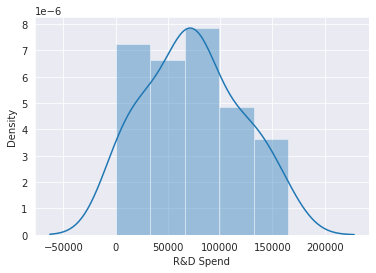

In [73]:
sns.distplot(df['R&D Spend'])

/home/deepak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

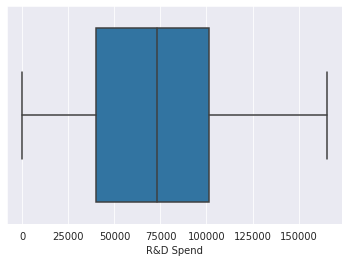

In [74]:
sns.boxplot(df['R&D Spend'])

/home/deepak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

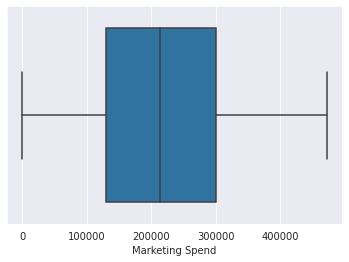

In [75]:
sns.boxplot(df['Marketing Spend'])

/home/deepak/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

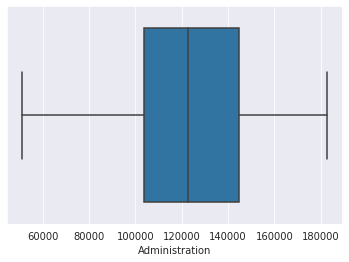

In [76]:
sns.boxplot(df['Administration'])

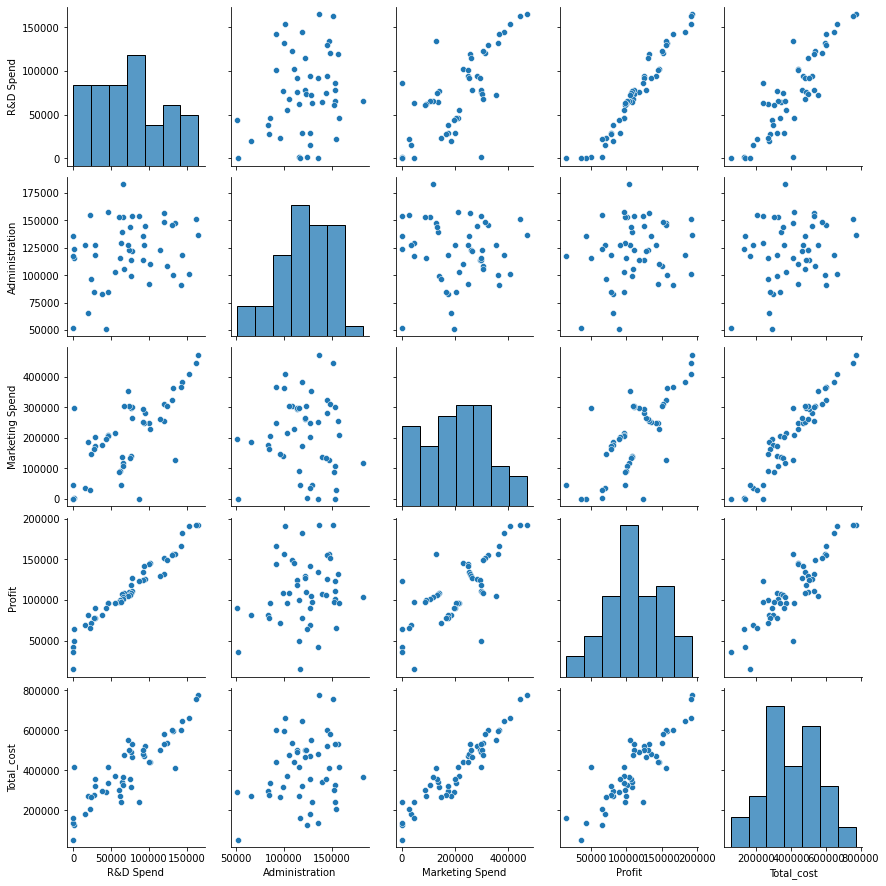

In [13]:
sns.pairplot(df)

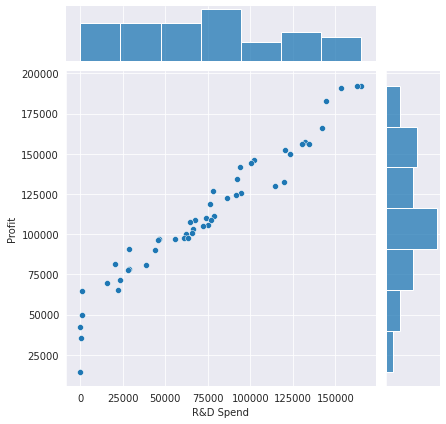

In [14]:
sns.set_style('darkgrid')
sns.jointplot(x=df['R&D Spend'],y=df['Profit'])

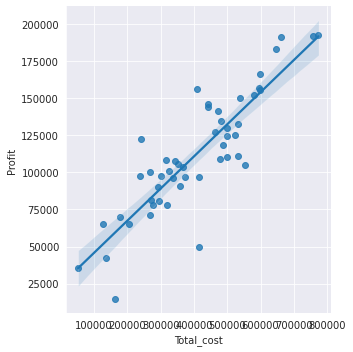

In [15]:
sns.lmplot(x='Total_cost',y='Profit',data=df)

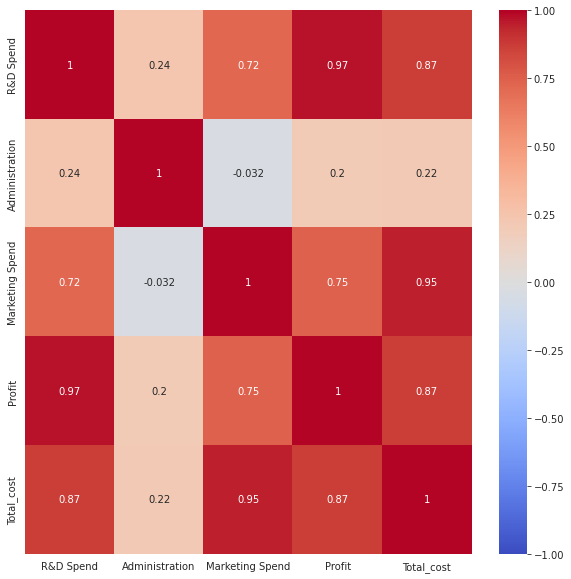

In [16]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

### One hot encoding

In [17]:
df1=pd.get_dummies(df['State'],drop_first=True)

In [18]:
df2=pd.concat([df1,df],axis=1)

In [19]:
df2.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit,Total_cost
0,0,1,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,0,0,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,0,1,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


In [20]:
df2.drop('State',axis=1,inplace=True)

In [21]:
df2.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit,Total_cost
0,0,1,165349.20,136897.80,471784.10,192261.83,774031.10
1,0,0,162597.70,151377.59,443898.53,191792.06,757873.82
2,1,0,153441.51,101145.55,407934.54,191050.39,662521.60
3,0,1,144372.41,118671.85,383199.62,182901.99,646243.88
4,1,0,142107.34,91391.77,366168.42,166187.94,599667.53


### Model Traning

#### Model 1 Without encoding

In [22]:
X=df.iloc[:,:-3]
y=df.iloc[:,-2]

In [23]:
print(X)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([0.7799469 , 0.0174003 , 0.03602112])

In [28]:
lr.intercept_

45925.62709663721

In [29]:
df_coeff= pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])


In [30]:
print(df_coeff)

                 Coefficient
R&D Spend           0.779947
Administration      0.017400
Marketing Spend     0.036021


In [31]:
Predict=lr.predict(X_test)
print(Predict)

[ 88287.41062646 151438.84017595 120537.82823503  99289.67306481
 116699.81127514 191366.93722057 112014.78869329  59669.24898719
  71369.19151394  48282.09608943]


Text(0, 0.5, 'Predicted Y')

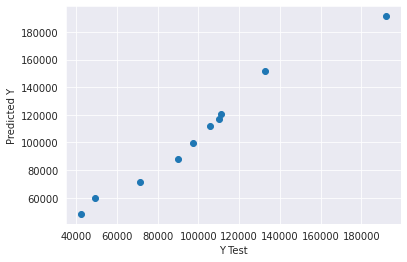

In [32]:
plt.scatter(y_test,Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


/home/deepak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


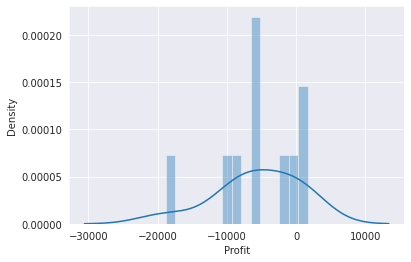

In [33]:
sns.distplot((y_test-Predict),bins=15);

In [34]:
from sklearn import metrics

In [35]:

print('MAE:',metrics.mean_absolute_error(y_test,Predict))
print('MSE:',metrics.mean_squared_error(y_test,Predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,Predict)))

MAE: 6066.865715986147
MSE: 66241729.62479818
RMSE: 8138.902237083216


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Predict)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9599179765802008


In [37]:
metrics.explained_variance_score(y_test,Predict)


0.9790540273704854

#### Model 2  With encoding

In [38]:
df2.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit,Total_cost
0,0,1,165349.20,136897.80,471784.10,192261.83,774031.10
1,0,0,162597.70,151377.59,443898.53,191792.06,757873.82
2,1,0,153441.51,101145.55,407934.54,191050.39,662521.60
3,0,1,144372.41,118671.85,383199.62,182901.99,646243.88
4,1,0,142107.34,91391.77,366168.42,166187.94,599667.53


In [39]:
X2=df2.iloc[:,:-2]
y2=df2.iloc[:,-2]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [42]:
lr1.coef_

array([ 9.38793006e+02,  6.98775997e+00,  8.05630064e-01, -6.87878823e-02,
        2.98554429e-02])

In [43]:
lr1.intercept_

54028.03959405868

In [44]:
df_coeff2=pd.DataFrame(lr1.coef_,X2.columns,columns=['Coeff'])

In [45]:
print(df_coeff2)

                      Coeff
Florida          938.793006
New York           6.987760
R&D Spend          0.805630
Administration    -0.068788
Marketing Spend    0.029855


In [46]:
pred=lr1.predict(X_test)

Text(0, 0.5, 'Predicted Y')

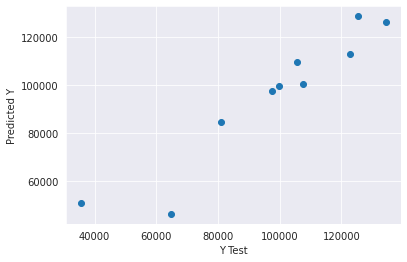

In [47]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/deepak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


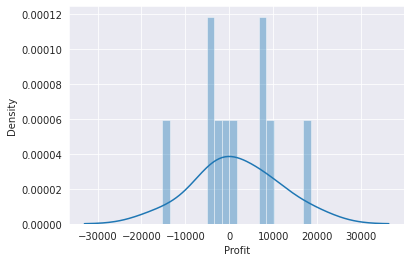

In [48]:
sns.distplot((y_test-pred),bins=20);

In [49]:
from sklearn import metrics


In [50]:
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_absolute_error(y_test,pred)))

MAE : 6961.477813275577
MSE : 82010363.04501422
RMSE : 83.4354709537591


In [51]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test,pred))

r2_score: 0.898726641431983


### Model 3 withonly 2 feature

In [52]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_cost
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


In [53]:
X3=df.loc[:,['R&D Spend','Marketing Spend']]
y3=df.iloc[:,-2]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X3,y3,test_size=0.2,random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression
lr3=LinearRegression()
lr3.fit(X_train,y_train)

LinearRegression()

In [56]:
lr3.coef_

array([0.7862322 , 0.03384374])

In [57]:
lr3.intercept_

47998.73174018237

In [58]:
df_coeff3=pd.DataFrame(lr3.coef_,X3.columns,columns=['Coeff'])

In [59]:
print(df_coeff3)

                    Coeff
R&D Spend        0.786232
Marketing Spend  0.033844


In [60]:
pred3=lr3.predict(X_test)

Text(0, 0.5, 'Predicted Y')

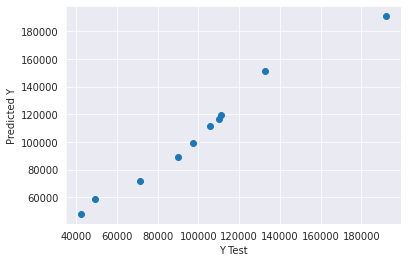

In [61]:
plt.scatter(y_test,pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/deepak/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


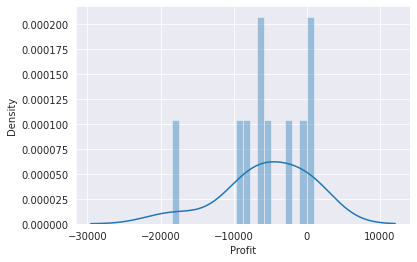

In [62]:
sns.distplot((y_test-pred3),bins=20);

In [63]:
print("MAE :",metrics.mean_absolute_error(y_test,pred3))
print("MSE :",metrics.mean_squared_error(y_test,pred3))
print("RMSE :",np.sqrt(metrics.mean_absolute_error(y_test,pred3)))

MAE : 5764.108940007768
MSE : 60978271.47203569
RMSE : 75.92172903726421


In [64]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_test,pred3))

r2_score: 0.963102827793222


In [65]:
metrics.explained_variance_score(y_test,pred3)


0.9810846217434439